# 직접 PCA를 구현한 mypca 

mypca.py 내부의 빈칸을 수정

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
import matplotlib.pyplot as plt

## DATA LOAD

In [2]:
iris = datasets.load_iris()
labels = np.array(iris.target).reshape(150,)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(data)

### sklearn pca

In [4]:
real_pca = PCA(2)
real_pca_features = real_pca.fit_transform(x)
real_components = real_pca.components_

### 구현한 pca

In [5]:
from mypca import mypca

%load_ext autoreload
%autoreload 2

my_pca = mypca(k=2)
my_pca_features = my_pca.fit_transform(x)
my_components = my_pca.components

## 결과 비교

고유벡터는 반대 방향일 수 있어서 abs의 차이로 판단

components의 결과와 data transform의 결과의 차이가 1e-6보다 작으면 정답

In [6]:
(abs(real_components)- abs(my_components[:2,:])).sum() < 1e-6

True

In [7]:
real_pca_features.shape

(150, 2)

In [8]:
my_pca_features.shape

(150, 2)

In [9]:
(abs(real_pca_features)-abs(my_pca_features)).sum() < 1e-6

True

# Q2: Word Vector Visualization using PCA and t-SNE

In [10]:
df = pd.read_csv('word_embedding.csv')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,the,-0.038194,-0.244870,0.72812,-0.399610,0.083172,0.043953,-0.39141,0.334400,-0.57545,...,0.016215,-0.017099,-0.38984,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.27062
1,of,-0.152900,-0.242790,0.89837,0.169960,0.535160,0.487840,-0.58826,-0.179820,-1.35810,...,0.187120,-0.018488,-0.26757,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.20664
2,to,-0.189700,0.050024,0.19084,-0.049184,-0.089737,0.210060,-0.54952,0.098377,-0.20135,...,-0.131340,0.058617,-0.31869,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.15983


In [11]:
df.set_index('0',inplace=True)

In [12]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
the,-0.038194,-0.24487,0.72812,-0.39961,0.083172,0.043953,-0.39141,0.3344,-0.57545,0.087459,...,0.016215,-0.017099,-0.38984,0.87424,-0.72569,-0.51058,-0.52028,-0.1459,0.8278,0.27062


## K-means

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
#sns.palplot(customPalette)

In [14]:
pca = PCA(2)
coordinates = pca.fit_transform(df)
df['PC1'],df['PC2'] = coordinates[:,0],coordinates[:,1] 

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(df[df.columns[:100]])
kmeans = KMeans(10)
kmeans.fit_transform(X)

array([[ 8.57446698,  8.61225629,  8.66714537, ...,  7.29047737,
         9.4928535 , 10.71802389],
       [10.02509847, 10.13706283, 10.03208956, ...,  9.37093953,
        11.13277562, 12.33000188],
       [10.53173422,  9.71978444, 10.05225577, ...,  8.62589442,
        10.65038475, 11.96395027],
       ...,
       [ 8.72524397,  9.19573529,  8.2524466 , ...,  9.12237252,
         6.8004632 ,  5.96145522],
       [ 8.17902997,  8.69626416,  8.23930469, ...,  8.71946486,
         7.49185043,  5.34784971],
       [ 8.26999695,  8.69803357,  8.3364128 , ...,  8.92267555,
         7.86367179,  5.79732597]])

In [16]:
df['label'] = kmeans.labels_

#### Visualization using orginal data

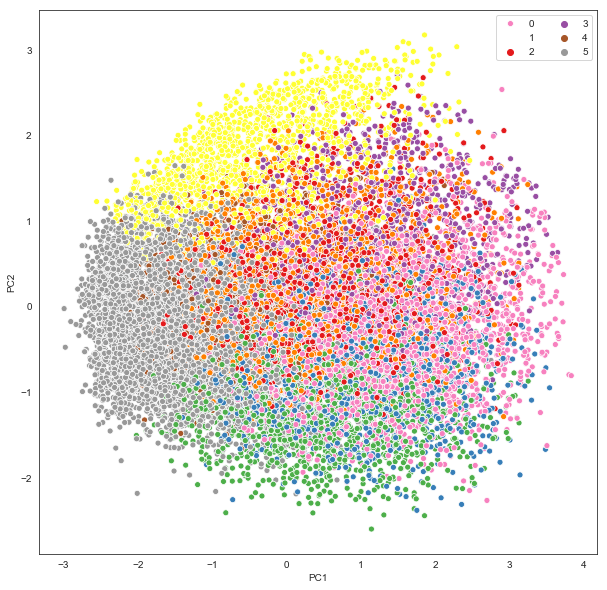

In [17]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PC1',y='PC2',hue='label',palette='Set1',data=df)
ax.legend('0123456789',ncol=2)

### Using PCA-transformed data

In [18]:
kmeans.fit_transform(list(zip(df['PC1'].values,df['PC2'].values)))

array([[1.87560206, 4.3777134 , 3.0364756 , ..., 1.58108137, 3.21495851,
        4.46977049],
       [1.68787243, 4.2743212 , 2.93485948, ..., 1.54421328, 3.04012794,
        4.43336134],
       [1.62147685, 4.36887723, 3.0424119 , ..., 1.77158686, 2.98876445,
        4.63187144],
       ...,
       [4.64500201, 2.06147273, 3.32944028, ..., 4.90148573, 3.35858561,
        3.01491282],
       [4.75959366, 1.84320035, 3.16728275, ..., 4.65607399, 3.66878226,
        2.18154844],
       [4.72632221, 1.80400017, 3.11776855, ..., 4.59336253, 3.65743823,
        2.08395301]])

In [19]:
df['PCA_label'] = kmeans.labels_

#### Visualization using PCA data

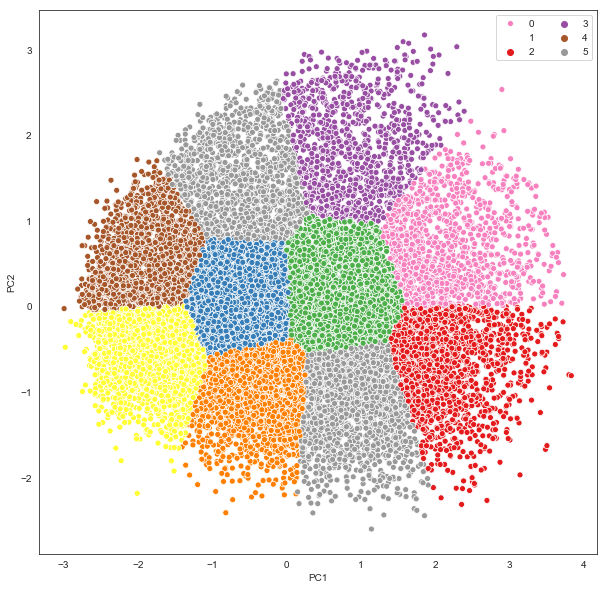

In [20]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x='PC1',y='PC2',hue='PCA_label',palette='Set1',data=df)
ax.legend('0123456789',ncol=2)

## Using t-SNE Data

In [21]:
from sklearn.manifold import TSNE
from datetime import datetime

tsne = TSNE(n_components=2 , perplexity=40, n_iter=300)

start_time = datetime.now()
tsne_results = tsne.fit_transform(df[df.columns[:100]])
end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time)) 

Duration: 0:02:23.424446


In [22]:
tsne_results.shape

(16577, 2)

In [23]:

kmeans.fit_transform(scaler.fit_transform(tsne_results))

array([[2.9376626 , 0.18668953, 2.6871622 , ..., 1.8684682 , 1.6904911 ,
        0.70976883],
       [2.9951189 , 0.1478533 , 2.7330036 , ..., 1.916938  , 1.7489973 ,
        0.7072494 ],
       [3.0910473 , 0.23126704, 2.7630985 , ..., 1.9605289 , 1.8703387 ,
        0.6124125 ],
       ...,
       [1.2306213 , 2.6396523 , 0.27833444, ..., 0.58625805, 1.507826  ,
        2.179711  ],
       [1.3607574 , 3.2667358 , 0.40272978, ..., 1.216616  , 2.0595105 ,
        2.7672472 ],
       [1.3684129 , 3.269063  , 0.4035802 , ..., 1.219413  , 2.065245  ,
        2.7679074 ]], dtype=float32)

In [24]:
df['tSNE label'] = kmeans.labels_

#### Visualization using t-SNE Data

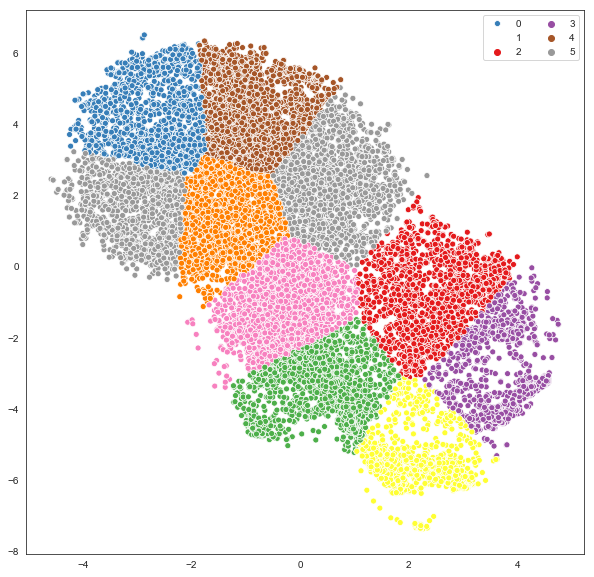

In [25]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=df['tSNE label'],palette='Set1')
ax.legend('0123456789',ncol=2)

# Q3: Training time 비교

In [26]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') #hide warnings
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report

In [27]:
train_df = pd.read_csv('train.csv')
train_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Label 과 Feature 분리
label = train_df['label']
train_df.drop('label',axis=1, inplace=True)

### Random Forest

In [29]:
#Original Data
start_time = datetime.now()
forest_clf = RFC(n_estimators=5, criterion = 'gini')
scores = cross_val_score(forest_clf,train_df,label)
end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Duration: 0:00:02.894259
Accuracy: 0.90 (+/- 0.00)


In [30]:
#Creating PCA data
real_pca = PCA(10)
pca_X = real_pca.fit_transform(train_df)

In [31]:
start_time = datetime.now()
forest_clf = RFC(n_estimators=5, criterion = 'gini')
scores = cross_val_score(forest_clf,pca_X,label)
end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Duration: 0:00:01.320470
Accuracy: 0.86 (+/- 0.00)


### KNN w/ all workers

In [32]:
knn_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

In [33]:
start_time = datetime.now()
scores = cross_val_score(knn_clf,train_df,label)
end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Duration: 0:04:12.168635
Accuracy: 0.94 (+/- 0.00)


In [34]:
start_time = datetime.now()
scores = cross_val_score(knn_clf,pca_X,label)
end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Duration: 0:00:01.057172
Accuracy: 0.92 (+/- 0.00)
